In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape


(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

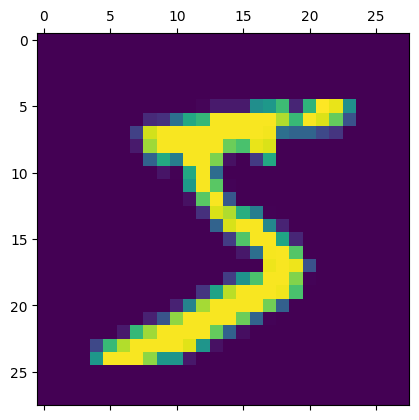

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
y_train[:5]


array([5, 0, 4, 1, 9], dtype=uint8)

flattening the dataset

In [10]:
X_train.shape

(60000, 28, 28)

scale the datasets

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:

X_train_Flattenned = X_train.reshape(len(X_train),28*28)
X_test_Flattenned = X_test.reshape(len(X_test),28*28)


In [13]:
X_train_Flattenned.shape ,X_test_Flattenned.shape


((60000, 784), (10000, 784))

Define Neural Networks

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

tf_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/',histogram_freq=1)
# to run the logs dir in terminal with relative path  = tensorboard --logdir logs/
model.compile(
    # optimizer='adam',
    optimizer='SGD',
    
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_Flattenned, y_train, epochs=5,callbacks=[tf_callback])

c:\Users\codea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.evaluate(X_test_Flattenned, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8941 - loss: 0.3847


[0.33604687452316284, 0.907800018787384]

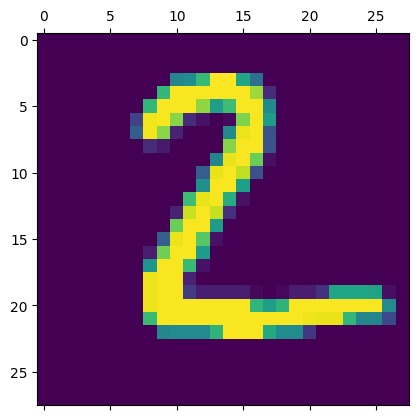

In [ ]:
plt.matshow(X_test[1])

In [ ]:
y_pred = model.predict(X_test_Flattenned)
y_pred[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([9.2731416e-01, 1.5709043e-01, 9.9871016e-01, 9.4016582e-01,
       9.1125042e-04, 9.4766235e-01, 9.8439527e-01, 4.7230101e-04,
       9.1444272e-01, 4.9496274e-03], dtype=float32)

In [ ]:
np.argmax(y_pred[1])

2

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
y_predected_label=[np.argmax(i) for i in y_pred]
y_predected_label[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predected_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    3,    2,    0,    3,    5,    1,    3,    0],
       [   0, 1101,    2,    4,    1,    2,    4,    1,   20,    0],
       [  11,    4,  896,   19,   16,    0,   13,   20,   44,    9],
       [   5,    1,   17,  906,    1,   30,    2,   15,   21,   12],
       [   2,    3,    5,    1,  909,    1,    8,    1,    8,   44],
       [  12,    4,    3,   44,   14,  748,   15,   11,   32,    9],
       [  18,    3,    4,    2,   17,   17,  893,    1,    3,    0],
       [   3,   18,   24,    6,   11,    0,    0,  925,    3,   38],
       [  10,    9,   10,   28,   10,   25,   11,   15,  842,   14],
       [  12,    6,    5,    9,   39,   14,    0,   22,    7,  895]])>

Text(95.72222222222221, 0.5, 'Truth')

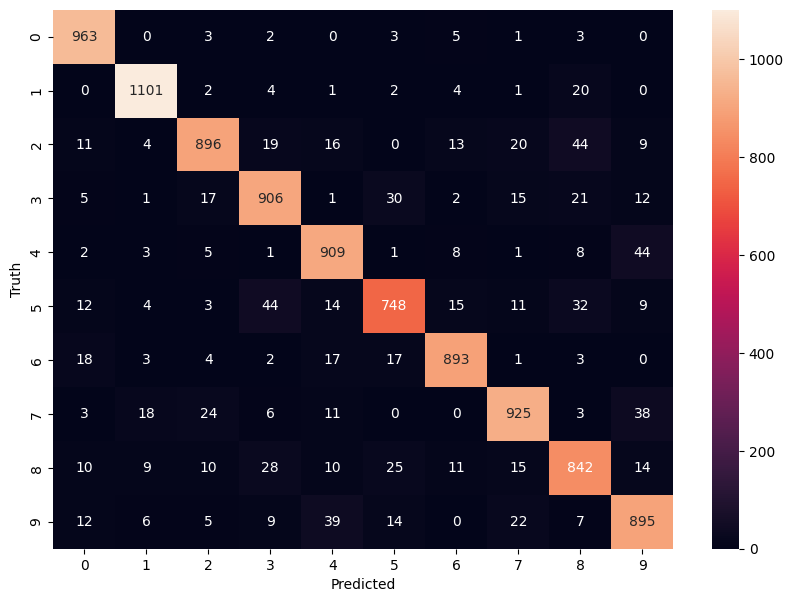

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Hidden Layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_Flattenned, y_train, epochs=5)

c:\Users\codea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7490 - loss: 0.8577
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9165 - loss: 0.2958
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9230 - loss: 0.2667
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9287 - loss: 0.2535
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9339 - loss: 0.2313


In [ ]:
model.evaluate(X_test_Flattenned, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9175 - loss: 0.2741


[0.23866237699985504, 0.9309999942779541]

Text(95.72222222222221, 0.5, 'Truth')

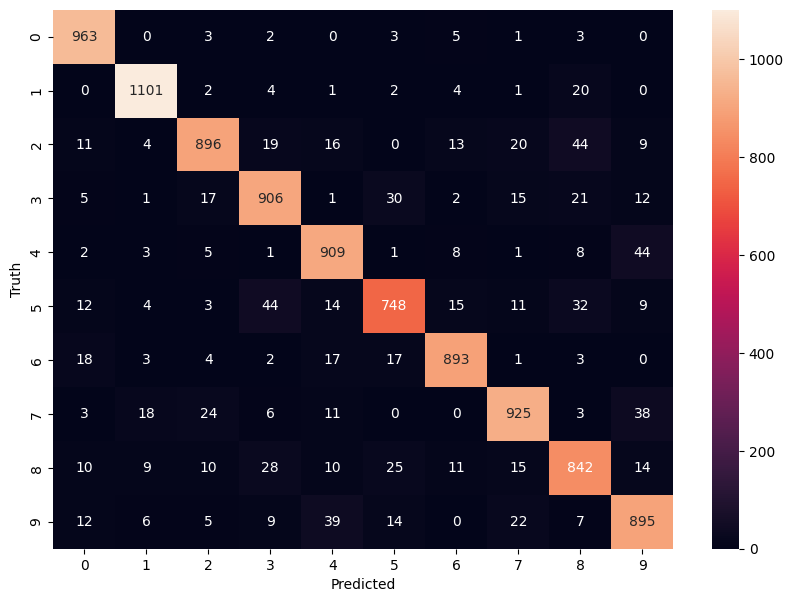

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,  activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

c:\Users\codea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8695 - loss: 0.4659
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9610 - loss: 0.1354
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9745 - loss: 0.0853
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9815 - loss: 0.0624
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9853 - loss: 0.0482
